In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

In [4]:
us_diff = us.diff()
vn_diff = vn.diff()

us_return = us.pct_change()
vn_return = vn.pct_change()

us_sign = np.sign(us_diff)
vn_sign = np.sign(vn_diff)

A=\{i|sign_i=1\}
$$\frac{\sum_{k\in A}sign_k}{\sum_{k\in \Omega}|sign_k|}$$

In [53]:
vn_sign

,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACG,ACL,...,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2013-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-26,-1.0,1.0,NaN,NaN,NaN,-1.0,-1.0,1.0,NaN,-1.0,...,NaN,-1.0,NaN,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN
2013-02-27,0.0,-1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,...,NaN,-1.0,NaN,1.0,-1.0,0.0,-1.0,1.0,NaN,NaN
2013-02-28,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,1.0,...,NaN,0.0,NaN,1.0,1.0,0.0,1.0,1.0,NaN,NaN
2013-03-01,-1.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,...,NaN,1.0,NaN,0.0,1.0,0.0,-1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0
2023-02-27,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
2023-02-28,-1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0


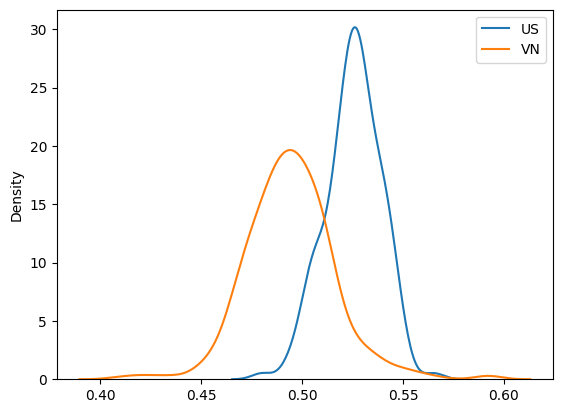

In [54]:
sns.kdeplot(us_sign[us_sign>0].sum()/abs(us_sign).sum(), label="US")
sns.kdeplot(vn_sign[vn_sign>0].sum()/abs(vn_sign).sum(), label="VN")
plt.legend()

A=\{i|diff_i>0\}
$$\frac{\sum_{k\in A}diff_k}{\sum_{k\in \Omega}|diff_k|}$$

In [55]:
vn_diff

,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACG,ACL,...,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2013-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-26,-166.0,42.0,NaN,NaN,NaN,-492.0,-71.0,45.0,NaN,-102.0,...,NaN,-227.0,NaN,-423.0,-447.0,163.0,-175.0,-131.0,NaN,NaN
2013-02-27,0.0,-85.0,NaN,NaN,NaN,45.0,23.0,0.0,NaN,0.0,...,NaN,-151.0,NaN,131.0,-64.0,0.0,-174.0,44.0,NaN,NaN
2013-02-28,55.0,0.0,NaN,NaN,NaN,44.0,0.0,0.0,NaN,34.0,...,NaN,0.0,NaN,29.0,128.0,0.0,218.0,43.0,NaN,NaN
2013-03-01,-27.0,0.0,NaN,NaN,NaN,359.0,24.0,0.0,NaN,0.0,...,NaN,227.0,NaN,0.0,128.0,0.0,-131.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-120.0,0.0,10.0,0.0,-50.0,-350.0,-800.0,200.0,-1200.0,100.0,...,-290.0,550.0,0.0,-400.0,300.0,0.0,0.0,-20.0,-120.0,-700.0
2023-02-27,-10.0,0.0,-100.0,-50.0,-50.0,-2500.0,-350.0,-50.0,0.0,-500.0,...,0.0,-690.0,-750.0,-1000.0,-150.0,0.0,-850.0,-90.0,-10.0,-600.0
2023-02-28,-10.0,-400.0,0.0,0.0,-80.0,2300.0,150.0,-150.0,900.0,-50.0,...,-80.0,-70.0,950.0,-50.0,50.0,0.0,0.0,0.0,-370.0,400.0


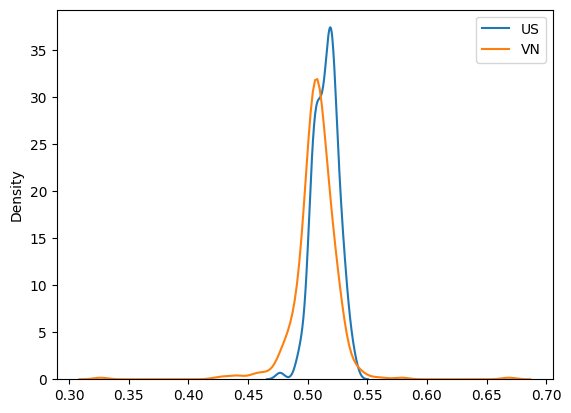

In [56]:
sns.kdeplot(us_diff[us_diff>0].sum()/abs(us_diff).sum(), label="US")
sns.kdeplot(vn_diff[vn_diff>0].sum()/abs(vn_diff).sum(), label="VN")
plt.legend()

A=\{i|return_i>0\}
$$\frac{\sum_{k\in A}return_k}{\sum_{k\in \Omega}|return_k|}$$

In [57]:
vn_return

,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACG,ACL,...,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2013-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-26,-0.040350,0.004058,NaN,NaN,NaN,-0.026732,-0.017808,0.011172,NaN,-0.025098,...,NaN,-0.056566,NaN,-0.067702,-0.058754,0.058069,-0.048910,-0.054743,NaN,NaN
2013-02-27,0.000000,-0.008179,NaN,NaN,NaN,0.002512,0.005873,0.000000,NaN,0.000000,...,NaN,-0.039884,NaN,0.022489,-0.008937,0.000000,-0.051131,0.019452,NaN,NaN
2013-02-28,0.013931,0.000000,NaN,NaN,NaN,0.002450,0.000000,0.000000,NaN,0.008582,...,NaN,0.000000,NaN,0.004869,0.018036,0.000000,0.067513,0.018647,NaN,NaN
2013-03-01,-0.006745,0.000000,NaN,NaN,NaN,0.019942,0.006093,0.000000,NaN,0.000000,...,NaN,0.062448,NaN,0.000000,0.017716,0.000000,-0.038004,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-0.013590,0.000000,0.001969,0.000000,-0.008475,-0.009642,-0.031496,0.014085,-0.028777,0.007968,...,-0.032222,0.058511,0.000000,-0.012739,0.007792,0.000000,0.000000,-0.002439,-0.020134,-0.061947
2023-02-27,-0.001148,0.000000,-0.019646,-0.004785,-0.008547,-0.069541,-0.014228,-0.003472,0.000000,-0.039526,...,0.000000,-0.069347,-0.028302,-0.032258,-0.003866,0.000000,-0.066667,-0.011002,-0.001712,-0.056604
2023-02-28,-0.001149,-0.034632,0.000000,0.000000,-0.013793,0.068759,0.006186,-0.010453,0.022222,-0.004115,...,-0.009185,-0.007559,0.036893,-0.001667,0.001294,0.000000,0.000000,0.000000,-0.063465,0.040000


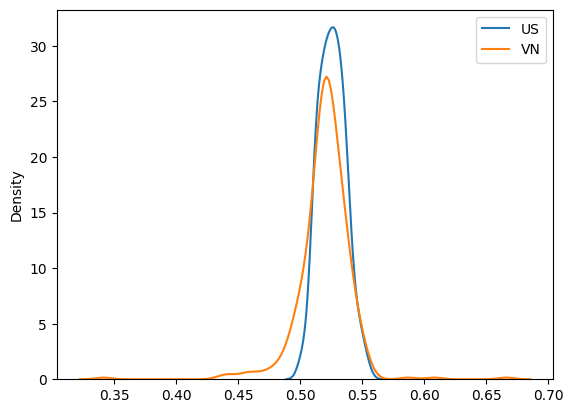

In [58]:
sns.kdeplot(us_return[us_return>0].sum()/abs(us_return).sum(), label="US")
sns.kdeplot(vn_return[vn_return>0].sum()/abs(vn_return).sum(), label="VN")
plt.legend()

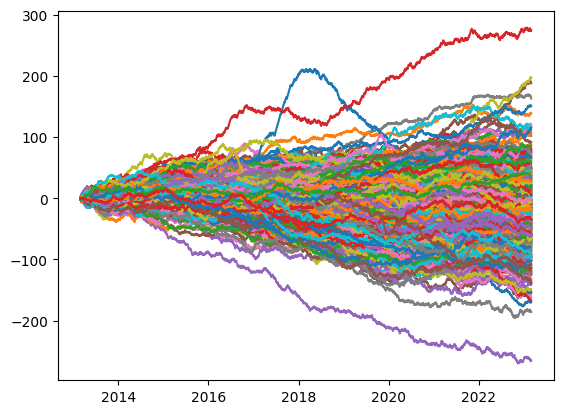

In [59]:
plt.plot(np.cumsum(vn_sign))

<AxesSubplot: xlabel='2023-03-02 00:00:00', ylabel='Density'>

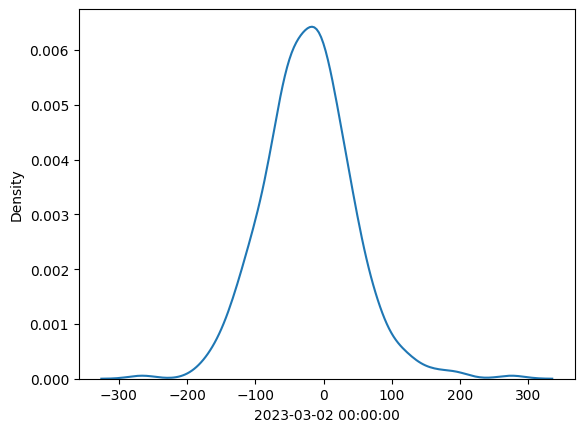

In [60]:
sns.kdeplot(np.cumsum(vn_sign).iloc[-1,])

### Mô phỏng sự tăng giảm của giá 406 công ty trong 2502 ngày

(0.0, 2505.0, -200.0, 300.0)

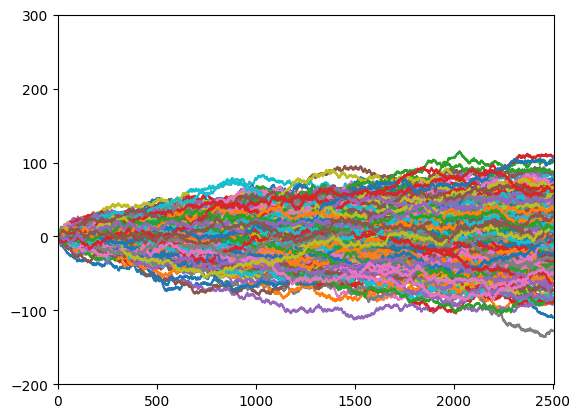

In [71]:
li = np.random.choice([-1, 0, 1], size=(406, 2502))
cumsum = np.cumsum(li, axis=1)

for i in range(406):
    plt.plot(cumsum[i])

plt.axis([0, 2505, -200, 300])

### Cummulative return of 406 company through 2502 days

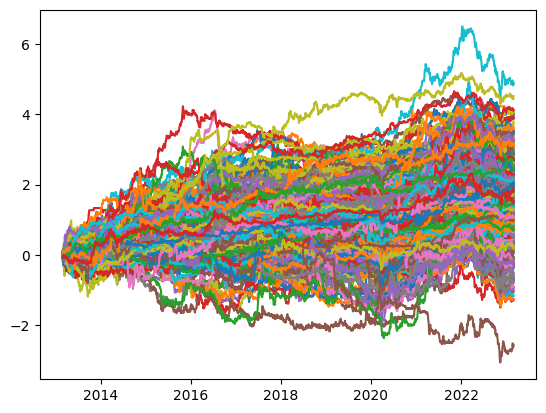

In [5]:
plt.plot(np.cumsum(vn_return))

<AxesSubplot: xlabel='2023-03-02 00:00:00', ylabel='Density'>

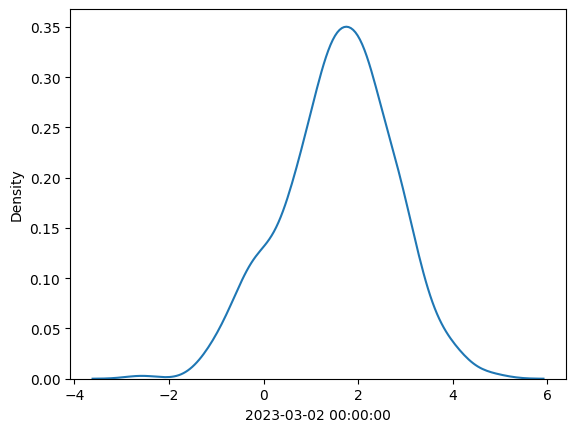

In [7]:
sns.kdeplot(np.cumsum(vn_return).iloc[-1,])

### Brownian motion stimulation for 406 companies through 2502 days
Cho $\{Y_j\}_{j=1}^n$ là một họ của các biến ngẫu nhiên chuẩn $\mathcal N(0,0.03)$, độc lập xác định trên không gian xác suât $(\Omega,\mathcal F,\mathbb P)$

$$
B_0=0,\\
B_k=\sum^{2502}_{j=1}Y_j\\
X_t = B_T +\frac2{2502}t
$$

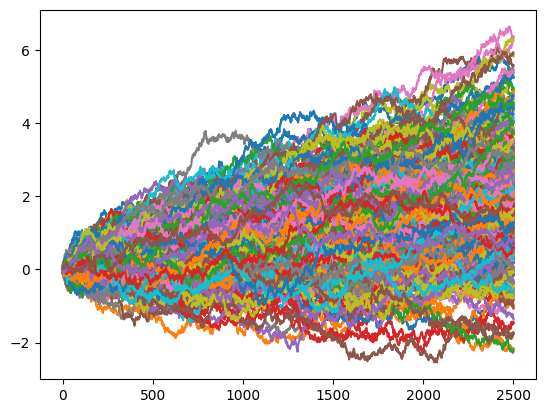

In [10]:
for i in range(406):
    plt.plot(np.cumsum(np.random.normal(0,0.03,2502)+2/2502))

## Mỹ

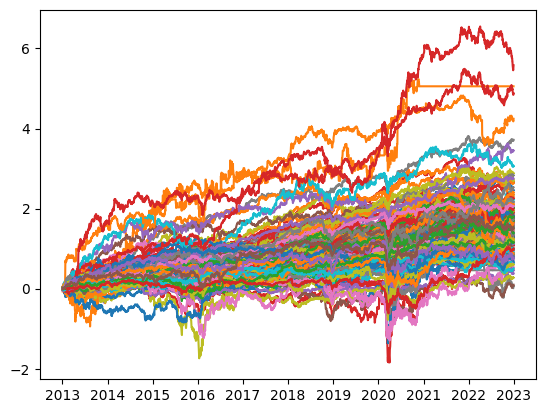

In [64]:
plt.plot(np.cumsum(us_return))

<AxesSubplot: xlabel='2022-12-30 00:00:00', ylabel='Density'>

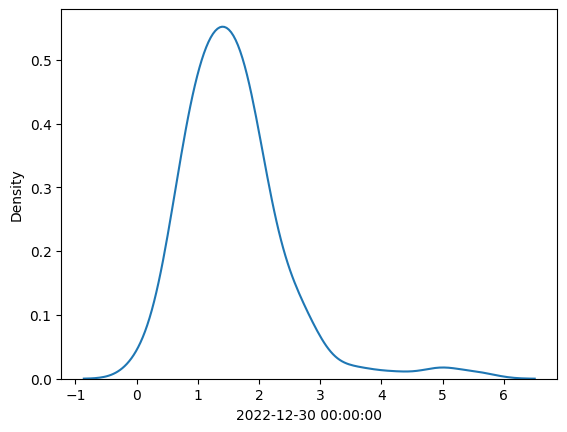

In [65]:
sns.kdeplot(np.cumsum(us_return).iloc[-1,])

### Brownian motion stimulation for 176 companies through 2518 days
Cho $\{Y_j\}_{j=1}^n$ là một họ của các biến ngẫu nhiên chuẩn $\mathcal N(0,0.02)$, độc lập xác định trên không gian xác suât $(\Omega,\mathcal F,\mathbb P)$

$$
B_0=0,\\
B_k=\sum^{2502}_{j=1}Y_j\\
X_t=B_t+\frac2{1250}t
$$



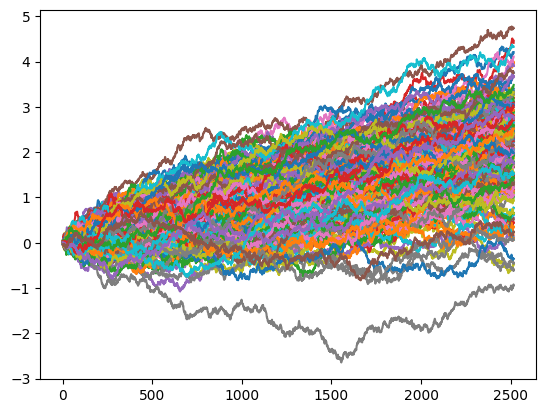

In [66]:
for i in range(176):
    plt.plot(np.cumsum(np.random.normal(0,0.02,2518)+2/2518))